In [1]:
import sys 
sys.path.append('../../')

In [23]:
import numpy as np
import pandas as pd


def load_dataset(datasetname):
    df = pd.read_csv(datasetname)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

## KMeans
Based on earlier research, we will be using a elbow plot to estimate the "k-value".
In addition to this, we are also be-able to use a silhouette plot to get a good estimation.

In [24]:
from yellowbrick.cluster import KElbowVisualizer

dataset = load_dataset('../../data/seeds-dataset/rq1.csv')
dataset.head()

,area,perimeter,class
0,15.26,14.84,0
1,14.88,14.57,0
2,14.29,14.09,0
3,13.84,13.94,0
4,16.14,14.99,0


In [26]:
from sklearn.cluster import KMeans


model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff82e520d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff82e520d0>
Traceback 

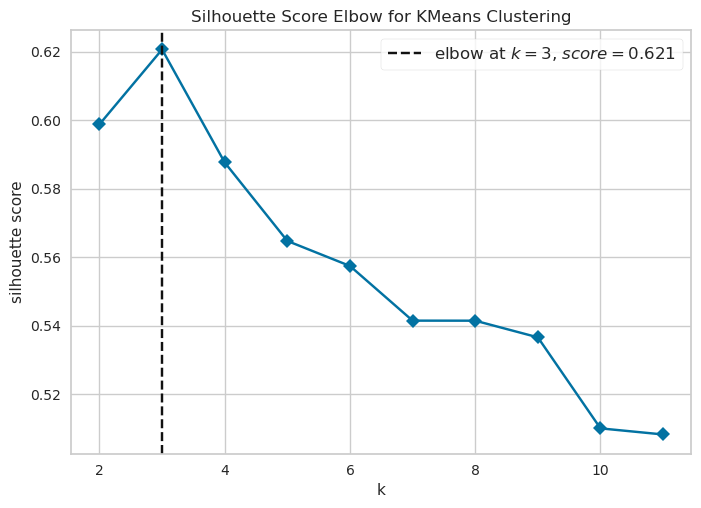

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [27]:
visualizer.fit(dataset)      # Fit the data to the visualizer
visualizer.show()

In [28]:
import seaborn as sns

n_clusters = 3
model = KMeans(n_clusters=n_clusters, init='random', algorithm='lloyd')
model.fit(dataset)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff670e1ca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff67137a60>
Traceback 

KMeans(init='random', n_clusters=3)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


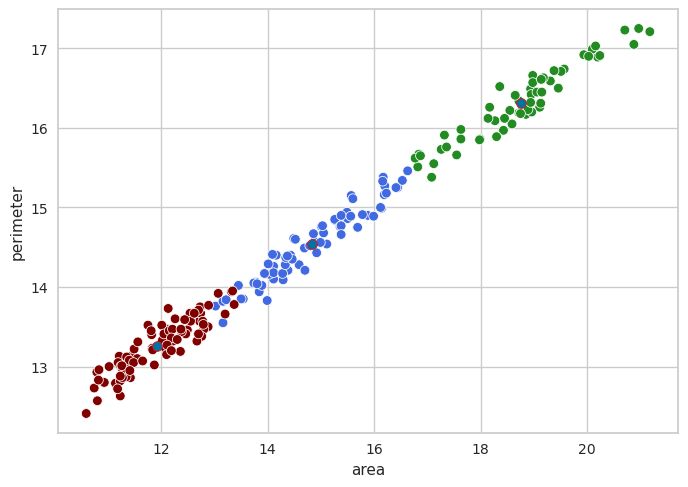

In [29]:
from matplotlib import pyplot as plt

means = model.cluster_centers_
X = dataset
ax = sns.scatterplot(X['area'], X['perimeter'], c=vectorizer(model.labels_))
ax = sns.scatterplot(means[:, 0], means[:, 1], ec='red', legend=False, ax=ax)
plt.show()

## DBSCAN

Considering two parameters:
- Minimum points ($minPts): Is considered as n * 2, which means we set it to 4 (as n is the amount of features).
- Epsilon (radius): Is choosen based on a k-distance plot, that is created using 

In [30]:
from sklearn.neighbors import NearestNeighbors


neigh = NearestNeighbors(n_neighbors=2)
neighbours = neigh.fit(X)
distances, indices = neighbours.kneighbors(X)

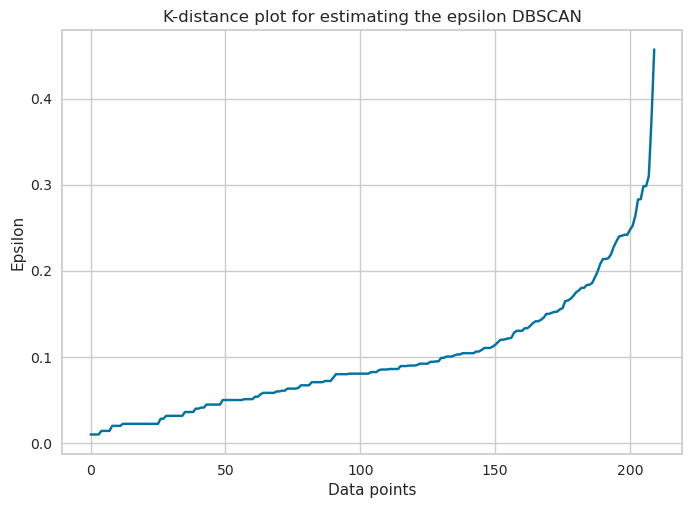

In [31]:
import numpy as np


distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('K-distance plot for estimating the epsilon DBSCAN')
plt.xlabel('Data points')
plt.ylabel('Epsilon')
plt.plot(distances)

In [21]:
from sklearn.cluster import DBSCAN


epsilon = 0.5
m = DBSCAN(eps=epsilon, min_samples=4, metric='euclidean')
m.fit(X)


DBSCAN(min_samples=4)

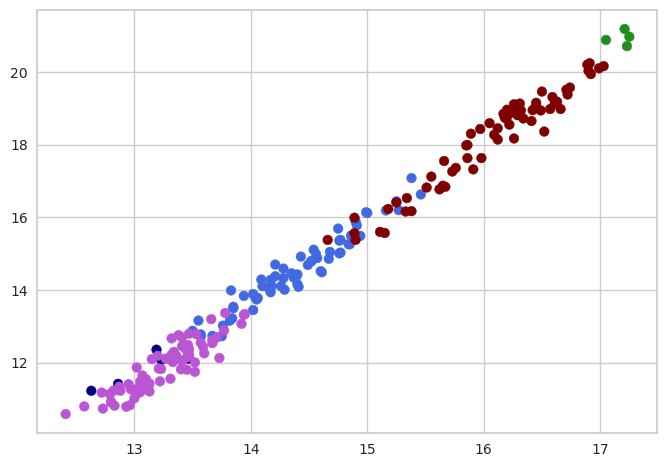

In [22]:
clusters = m.labels_
plt.scatter(X['perimeter'], X['area'], c=vectorizer(clusters))
plt.show()

## Affinity Propagation

In [12]:
from sklearn.cluster import AffinityPropagation


ap = AffinityPropagation(damping=0.5, affinity='euclidean')
ap.fit(X)

AffinityPropagation()

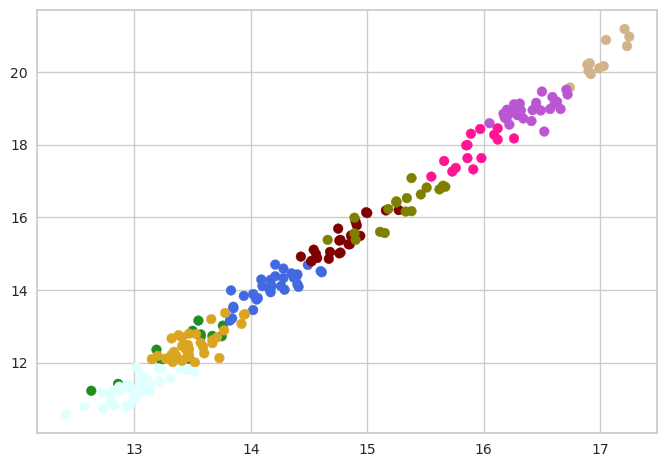

In [13]:
clusters = ap.labels_
plt.scatter(X['perimeter'], X['area'], c=vectorizer(clusters))
plt.show()